<a href="https://colab.research.google.com/github/mahan2210/Pytorch_scratch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [ ]:
weight= 0.7
bias = 0.3

start = 0
end= 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
#Splitting data into training and test sets
train_split= int(0.8 * len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#Visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plor test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14})

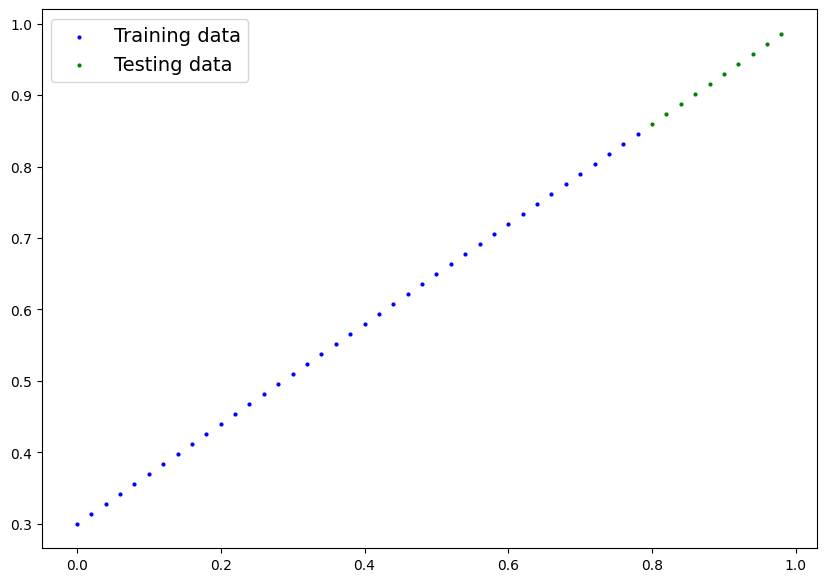

In [ ]:
plot_predictions()

In [ ]:
#Build

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    return self.weights * x + self.bias

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
#make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
#check out model's parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
model_0

LinearRegressionModel()

In [ ]:
#loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Building training loop in PyTorch
#An epoch is one loop through the data
torch.manual_seed(42)
epochs =200

#Track different values
epoch_count=[]
loss_values = []
test_loss_values = []

#0. Loop through the data
for epoch in range(epochs):
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  #2. calculate loss
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")


  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_0.eval() # Turns off different settings in the model not needed for evaluation/testing (Dropout/ batch norm layers)
  with torch.inference_mode(): # turn off gradient tracking
    test_preds= model_0(X_test) #Forward passing
    test_loss = loss_fn(test_preds, y_test)
  #Print out what happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} |Test_loss:{test_loss}")
    print(model_0.state_dict())

Epoch:0 | Loss:0.31288138031959534 |Test_loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.1976713240146637 |Test_loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.08908725529909134 |Test_loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss:0.053148526698350906 |Test_loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss:0.04543796554207802 |Test_loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss:0.04167863354086876 |Test_loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss:0.03818932920694351 |Test_loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70 | Loss:0.0347

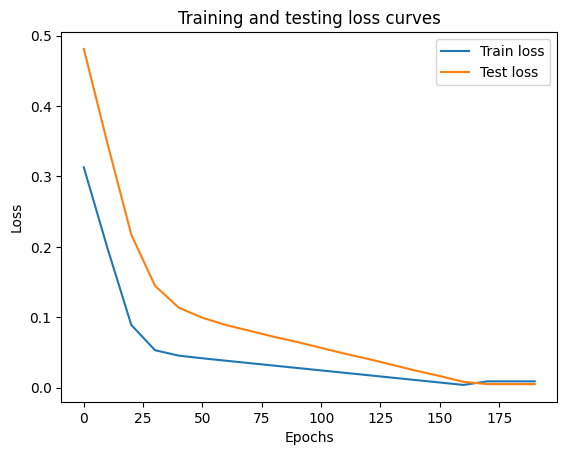

In [ ]:
import numpy as np
#Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
#or
# #Plot the loss curve
# plt.plot(epoch_count, [loss.detach().numpy() for loss in loss_values], label="Train loss")
# plt.plot(epoch_count, [loss.detach().numpy() for loss in test_loss_values], label="Test loss")
# plt.title("Training and testing loss curves")
# plt.ylabel("Loss")
# plt.xlabel("Epochs")
# plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight,bias

(0.7, 0.3)

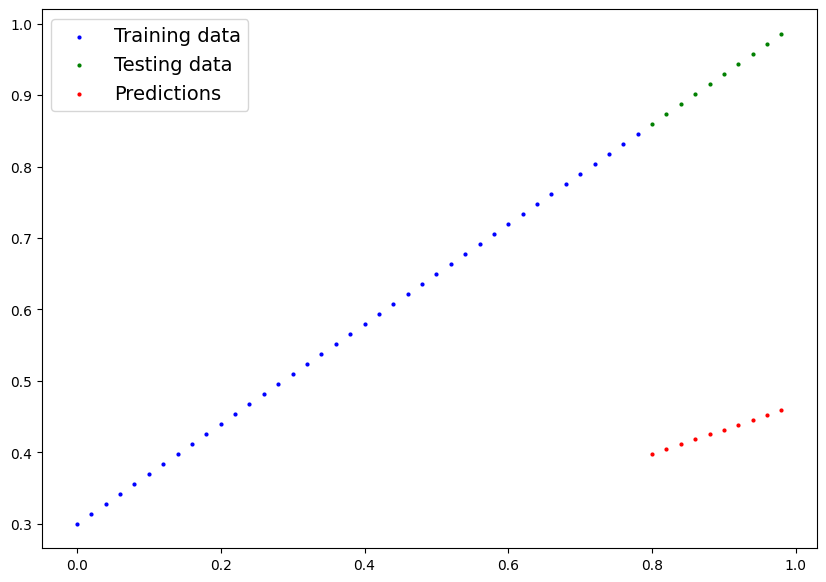

In [ ]:
plot_predictions(predictions=y_preds)

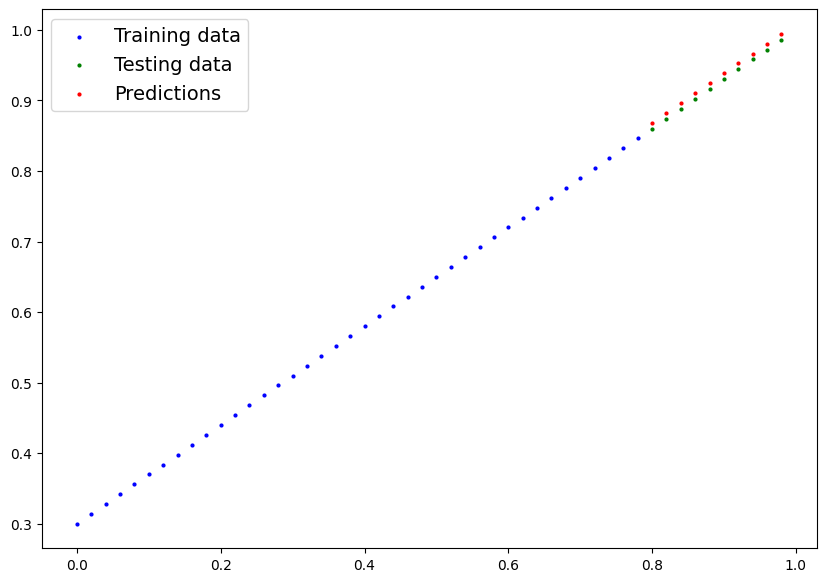

In [ ]:
#plot_predictions(predictions=test_preds)
plot_predictions(predictions=y_preds_new)

In [ ]:
#@title Saving a model in pytorch
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME= "01_pytorch_wm_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_wm_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1544 May 20 17:27 01_pytorch_wm_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
## Loadning a pytorch model: saved state_dict
loaded_model_0= LinearRegressionModel()

#Load saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some prediction
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds= loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Compare loaded model preds with original model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
#@title Putting it all together (Recap)
#iomport pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__


'2.6.0+cu124'

In [ ]:
#Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Tue May 20 17:27:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#@title Data Creation

In [ ]:
#create data using the linear regression formula of y = weight*X + bias
weight = 0.7
bias = 0.3

#Create range value
start= 0
end = 1
step = 0.02

#Create X and Y (features (X) and Labels (y))
X= torch.arange(start, end, step).unsqueeze(1)
y= weight*X+bias
X[:40], y[:40]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
len(X)
len(y)

50

In [ ]:
#Split data
train_split= int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

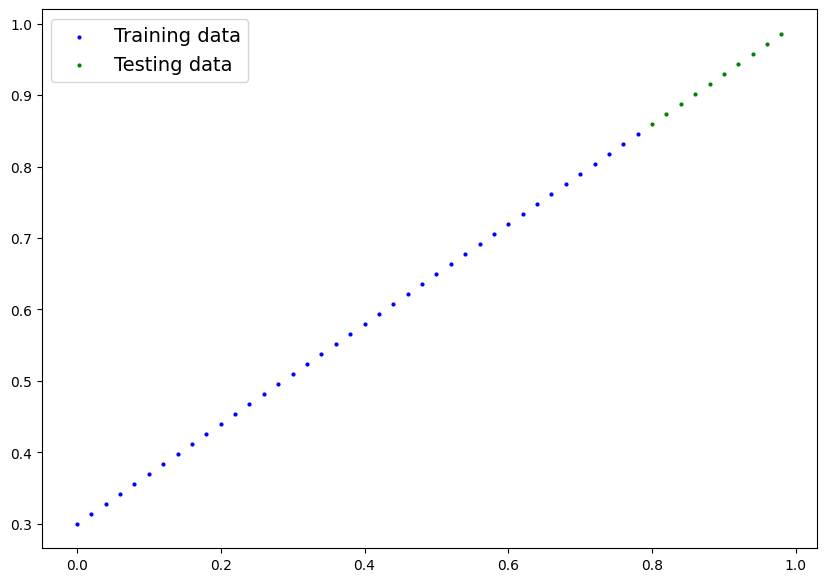

In [ ]:
# Plot the data
#Required plot prediction function, written earlier above...
#Visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plor test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14})
plot_predictions(X_train, y_train,X_test,y_test)

In [ ]:
#@title Building pytorch linear model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters/ fully connected layer/ linear transform
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

#Set manual seed
torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check the model current device
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
device

'cuda'

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#@title Training


For Training we need:
1. Loss function: measure how wrong the model is
2. Optimizer: Optimize the parameter
3. Training Loop
4. Testing loop


In [ ]:
#Setup loss function
loss_fn=nn.L1Loss()
#Setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
#Traing Loop
torch.manual_seed(42)
epochs = 200

#Put data on the target device (Device Agnostic code for Data)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Back propagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss= loss_fn(test_pred,y_test)

  #print out progress
  if epoch % 10 == 0:

    print(f"Epoch:{epoch} | Loss:{loss} |Test_loss:{test_loss}")
    #print(model_1.state_dict())



Epoch:0 | Loss:0.5551779866218567 |Test_loss:0.5739762187004089
Epoch:10 | Loss:0.439968079328537 |Test_loss:0.4392664134502411
Epoch:20 | Loss:0.3247582018375397 |Test_loss:0.30455657839775085
Epoch:30 | Loss:0.20954833924770355 |Test_loss:0.16984669864177704
Epoch:40 | Loss:0.09433845430612564 |Test_loss:0.03513690456748009
Epoch:50 | Loss:0.023886388167738914 |Test_loss:0.04784907028079033
Epoch:60 | Loss:0.019956795498728752 |Test_loss:0.045803118497133255
Epoch:70 | Loss:0.016517987474799156 |Test_loss:0.037530567497015
Epoch:80 | Loss:0.013089174404740334 |Test_loss:0.02994490973651409
Epoch:90 | Loss:0.009653178043663502 |Test_loss:0.02167237363755703
Epoch:100 | Loss:0.006215683650225401 |Test_loss:0.014086711220443249
Epoch:110 | Loss:0.00278724217787385 |Test_loss:0.005814164876937866
Epoch:120 | Loss:0.0012645035749301314 |Test_loss:0.013801801018416882
Epoch:130 | Loss:0.0012645035749301314 |Test_loss:0.013801801018416882
Epoch:140 | Loss:0.0012645035749301314 |Test_loss:0.

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#@title Evaluation

model_1.eval()

#Make prediction on test data
with torch.inference_mode():
    y_preds=model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

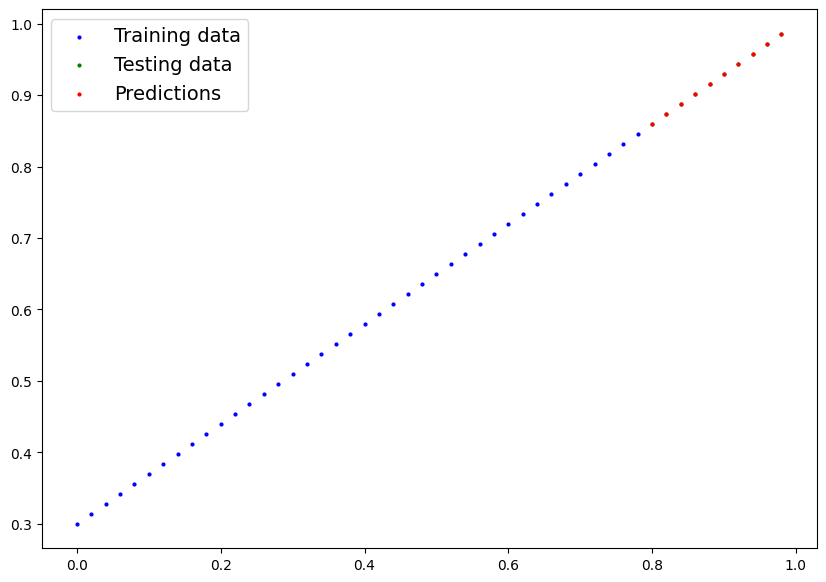

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
#Save and load the model
from pathlib import Path

#1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME= "01_pytorch_wm_1.pth"
MODEL_SAVE_PATH1= MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH1

#Save the model
print(f"Saving model to: {MODEL_SAVE_PATH1}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH1)

Saving model to: models/01_pytorch_wm_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a pytorch model

#create new instance of linear regression model v2
loaded_model_1= LinearRegressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH1))

#Put the target model to the device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
##Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds= loaded_model_1(X_test)
y_preds ==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')